## Real state price predictor 

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info() #information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts() #counting the value 

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.282994,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704535,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
# # for plotting histogram
import matplotlib.pyplot as plt
# housing.hist(bins=50,figsize=(20,20),facecolor='r')
# plt.show()

## train-test splitting

In [9]:
# # for learning pursope 
import numpy as np
# def split_tarin_test(data, test_ratio): # creating train and test sets , this is present in sklearn, but we can learn things
#     np.random.seed(42) # to separate the train and test set
#     shuffled = np.random.permutation(len(data)) # randomized the data
#     test_set_size = int(len(data) * test_ratio) # getting the train data
#     test_indices = shuffled[:test_set_size]     #getting the test data
#     train_indices = shuffled[test_set_size:]    #getting data for training
#     return data.iloc[train_indices],data.iloc[test_indices] 

In [10]:
# train_set, test_set = split_tarin_test(housing, 0.2)

In [11]:
# print(f"Rows is train set : {len(train_set)}\n Rows is test set : {len(test_set)}") #creating the train and test set

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows is train set : {len(train_set)}\n Rows is test set : {len(test_set)}") #creating the train and test set

Rows is train set : 404
 Rows is test set : 102


## StratifiedShuffledSplit for the features which are most important for predictions

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [14]:
# start_test_set['CHAS'].value_counts()

In [15]:
# strat_train_set ['CHAS'].value_counts()

In [16]:
housing = strat_train_set.copy()

## Looking for correlations 

In [17]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False) # 1 = strong positive correlation ,+ve= will incrase with MEDV
                                            # -ve = will decrease with MEDV, -1 = strong negative correlation

MEDV       1.000000
RM         0.679217
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbb31d2650>,
      dtype=object)

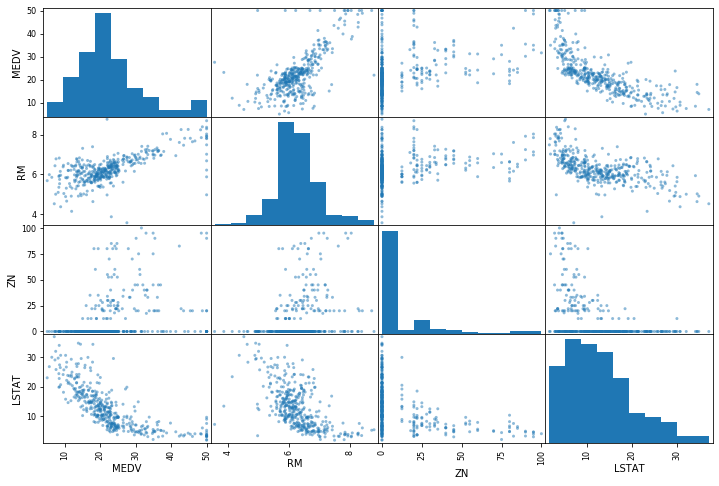

In [18]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(housing[attributes],figsize = (12,8))

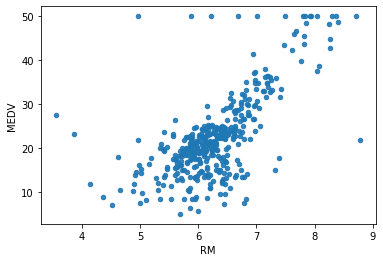

In [19]:
housing.plot(kind = "scatter", x= "RM",y = "MEDV", alpha = 0.9)

## Trying Out Attributes combination

In [20]:
housing['TAXRM'] = housing['TAX']/housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [21]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False) # 1 = strong positive correlation ,+ve= will incrase with MEDV
                                            # -ve = will decrease with MEDV, -1 = strong negative correlation

MEDV       1.000000
RM         0.679217
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.523468
LSTAT     -0.740494
Name: MEDV, dtype: float64

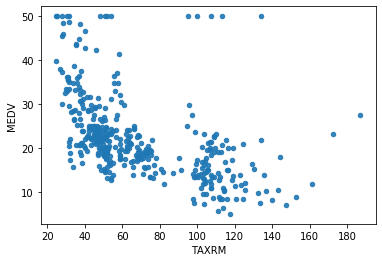

In [22]:
housing.plot(kind = "scatter", x= "TAXRM",y = "MEDV", alpha = 0.9)

In [23]:
housing = strat_train_set.drop('MEDV',axis=1) # we are not taking the TAXRM column as we are taking strat_train_set which is the original training table
housing_labels = strat_train_set['MEDV'].copy()

## Missing Attributes

In [24]:
# To take care missing attributes we have three options :
#     1: Get rid of the missing data points id there is small no of missing values
#     2: Get rid of the the whole attribute if the relation between output label is not that good
#     3: set the values to some values (0 or mean or )

In [25]:
# a = housing.dropna(subset = ["RM"]) #option 1 
# a.shape

In [26]:
# housing.drop("RM",axis = 1) #option 2  axis=1 ie the column
# # original housing will remain unchanged

In [27]:
median = housing["RM"].median() #option 3
housing['RM'].fillna(median)
# original housing will remain unchanged
housing.shape
housing.describe() # before filling the missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277439,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.713820,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [28]:
# there is a class in sklearn which can compute median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [29]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [30]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns = housing.columns)  # housing_tr --> transform data set after filling the missing values
housing_tr.describe()  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.276931,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711183,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily three types of objects in scikit-learn
1. Estimators -  It estimates some parameter based on a dataset , Eg: imputer. It has a fit method and transform method. Fit method- Firts the data set and calculate internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It has also a convenience funtion fit_tranform() , which fits and transforms.

3. Predictors - LinerRegression model is a example, fit and predict are two common functions , it also gives us some score() function which will evaluate the prediction. Predictors will take numpy array as input

## Feature Scalling

Primarily two types of feature scaling method
1. Min-max Scalling(Normalization):
    (value - min ) / ( max - min )
    sklearn provides a class called MinMaxScaler for this 
    
2. Standardization:
    (value - min)/ std
    sklearn provieds a class called StandardScaler for this 
    

## Creating Pipeline 

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([   # pipeline takes a series of list in it
    ('imputer',SimpleImputer(strategy="median")),
#     ..... add as many as you want in your want    
    ('std_scaler', StandardScaler()),
])

In [32]:
housing_num_tr = my_pipeline.fit_transform(housing) # housing_num_tr is a numpy array

In [33]:
housing_num_tr.shape

(404, 13)

## Selecting a decide model for realstate

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [35]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [36]:
prepared_data = my_pipeline.transform(some_data)

In [37]:
model.predict(prepared_data)

array([22.492, 25.287, 16.516, 23.342, 23.419])

In [38]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the Model

In [39]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [40]:
rmse

1.1890782123348753

## Using better evaluation Technique - Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10 )
rmse_scores = np.sqrt(-scores)

In [42]:
rmse_scores

array([2.76194456, 2.68783836, 4.48244944, 2.62324185, 3.40428279,
       2.88684791, 4.77801453, 3.35820583, 3.13159234, 3.24336295])

In [43]:
def print_scores(scores) : 
    print("scores are : ",scores)
    print("Mean :", scores.mean())
    print("Standard Deviation:  ", scores.std())

In [44]:
print_scores(rmse_scores)

scores are :  [2.76194456 2.68783836 4.48244944 2.62324185 3.40428279 2.88684791
 4.77801453 3.35820583 3.13159234 3.24336295]
Mean : 3.335778056912112
Standard Deviation:   0.7006201832100022


## saving the model

In [45]:
from joblib import dump,load
dump(model , 'DragonRealstate.joblib')

['DragonRealstate.joblib']

## Testing the model

In [48]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions,list(Y_test))

[24.382 11.814 25.961 22.278 18.991 14.843 20.424 14.464 31.652 41.768
 19.842 11.737 25.059 27.735 19.776 11.41  32.5   14.143 23.657 19.062
 19.672 17.904 16.408 22.36  18.222 31.044 15.959 33.346  9.35  34.165
 23.524 21.044 23.195 11.354 20.978 10.922 43.616 24.455 24.8   42.425
 23.897 29.308 20.547 20.783 19.209 33.969 44.799 19.948 19.973 22.27
 21.141 14.185 21.516 15.216 24.992 33.899 41.804 29.036 19.908 20.506
 46.249  9.406 19.104 25.544 14.752 34.522 19.973 17.7   19.266 33.959
 25.809 22.62  21.544 22.502 35.748 12.726 15.662 20.044 20.803 21.355
 22.469 21.184 14.066 22.548 20.982 21.211 13.726 21.176 22.034 23.047
 18.584 26.694  7.344 26.106 18.493 29.391 19.964 33.979 14.497 26.72
 21.257 20.377] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 

In [47]:
final_rmse

3.0043329852522174

In [49]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23782941, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using The Model

In [50]:
from joblib import dump,load
import numpy as np
model = load('DragonRealstate.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23782941, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.492])